In [1]:
pip install pycaret



  Using cached scipy-1.5.4-cp38-cp38-win_amd64.whl (31.4 MB)
  Using cached Cython-0.29.14-cp38-cp38-win_amd64.whl (1.7 MB)
  Using cached llvmlite-0.37.0-cp38-cp38-win_amd64.whl (17.0 MB)
  Using cached numpy-1.20.3-cp38-cp38-win_amd64.whl (13.7 MB)
     ------------------------------------- 233.6/233.6 kB 44.9 kB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.1.2
    Uninstalling Werkzeug-2.1.2:
      Successfully uninstalled Werkzeug-2.1.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.32
    Uninstalling Cython-0.29.32:
      Successfully uninstalled Cython-0.29.32
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.0
    Uninstalling scipy-1.10.0:
      Successfully uninstalled scipy-1.10.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.0.1 requires cmdstanpy==0.9.68, which is not installed.
arviz 0.11.2 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.4.0 which is incompatible.


In [2]:
pip install openpyxl

     ------------------------------------ 250.0/250.0 kB 255.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

## Charger le jeu de données 
**Scoringdata.xls**

In [5]:
df = pd.read_excel('Scoringdata.xls')
df.head()

,ID Prêt,Date Déblocage,Maturité mois,Montant Prêt BAM,Sexe,Etat Civil,Niveau Formation,Age ans,Ans à l'adresse,Locataire / Propriétaire,Nbre de Dépendants,Ans en Activité,Emplacement du business,Crédit Bureau négatif=1,NbreEmployésFamille,Type d'Activité,Ventes Mensuelles BAM,Bad91d+=1
0,RRB48,2018-07-24,23,8200,Male,Divorced,Completed University,32.0,1.0,RENT,2,1.0,Region3,0,1,Craftsperson,2550,0
1,KDI90,2018-07-04,21,9575,Male,Widowed,Completed University,44.0,7.0,RENT,1,7.0,Region1,0,1,Personal Services,1950,0
2,NKU187,2018-07-19,21,8200,Female,Married,Completed University,43.0,7.5,Own,5,7.5,Region3,0,3,Personal Services,1775,0
3,UNO260,2018-05-06,22,8425,Male,Married,Completed University,NaN,5.5,Own,3,5.5,Region4,0,3,Personal Services,1800,0
4,QTA277,2018-03-01,21,7625,Female,Married,Completed University,49.0,10.0,Own,3,8.0,Region3,1,3,Car Repair,5275,0


In [7]:
df_copy = df.copy()
df_copy.head()

,ID Prêt,Date Déblocage,Maturité mois,Montant Prêt BAM,Sexe,Etat Civil,Niveau Formation,Age ans,Ans à l'adresse,Locataire / Propriétaire,Nbre de Dépendants,Ans en Activité,Emplacement du business,Crédit Bureau négatif=1,NbreEmployésFamille,Type d'Activité,Ventes Mensuelles BAM,Bad91d+=1
0,RRB48,2018-07-24,23,8200,Male,Divorced,Completed University,32.0,1.0,RENT,2,1.0,Region3,0,1,Craftsperson,2550,0
1,KDI90,2018-07-04,21,9575,Male,Widowed,Completed University,44.0,7.0,RENT,1,7.0,Region1,0,1,Personal Services,1950,0
2,NKU187,2018-07-19,21,8200,Female,Married,Completed University,43.0,7.5,Own,5,7.5,Region3,0,3,Personal Services,1775,0
3,UNO260,2018-05-06,22,8425,Male,Married,Completed University,NaN,5.5,Own,3,5.5,Region4,0,3,Personal Services,1800,0
4,QTA277,2018-03-01,21,7625,Female,Married,Completed University,49.0,10.0,Own,3,8.0,Region3,1,3,Car Repair,5275,0


## Suppression des colonnes peu importantes: 'ID Prêt' et 'Date Déblocage'

In [8]:
df_copy = df_copy.drop(['ID Prêt','Date Déblocage'], axis =1)
df_copy.head()


,Maturité mois,Montant Prêt BAM,Sexe,Etat Civil,Niveau Formation,Age ans,Ans à l'adresse,Locataire / Propriétaire,Nbre de Dépendants,Ans en Activité,Emplacement du business,Crédit Bureau négatif=1,NbreEmployésFamille,Type d'Activité,Ventes Mensuelles BAM,Bad91d+=1
0,23,8200,Male,Divorced,Completed University,32.0,1.0,RENT,2,1.0,Region3,0,1,Craftsperson,2550,0
1,21,9575,Male,Widowed,Completed University,44.0,7.0,RENT,1,7.0,Region1,0,1,Personal Services,1950,0
2,21,8200,Female,Married,Completed University,43.0,7.5,Own,5,7.5,Region3,0,3,Personal Services,1775,0
3,22,8425,Male,Married,Completed University,NaN,5.5,Own,3,5.5,Region4,0,3,Personal Services,1800,0
4,21,7625,Female,Married,Completed University,49.0,10.0,Own,3,8.0,Region3,1,3,Car Repair,5275,0


## Préparer les données
Après avoir chargé les données, l’étape suivante consiste à préparer les données. À l’aide de PyCaret, 
la préparation des données est simple. Nous pouvons utiliser une fonction appelée setup à partir de la bibliothèque pycaret.
classification. Voici le code pour ce faire:

 - Bad91d+=0 -------> on lui accorde pas un crédit 
 - Bad91d+=1 -------> on lui accorde un crédit

In [9]:
from pycaret.classification import*
st = setup(data =df_copy, target = 'Bad91d+=1',session_id=123)

,Description,Value
0,session_id,123
1,Target,Bad91d+=1
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2333, 16)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9755,0.9931,0.9652,0.9950,0.9798,0.9487,0.9496,0.3000
gbc,Gradient Boosting Classifier,0.9743,0.9937,0.9632,0.9949,0.9788,0.9462,0.9471,0.2210
rf,Random Forest Classifier,0.9737,0.9929,0.9593,0.9979,0.9782,0.9450,0.9463,0.3920
lr,Logistic Regression,0.9724,0.9944,0.9593,0.9959,0.9772,0.9424,0.9436,1.8010
ridge,Ridge Classifier,0.9724,0.0000,0.9553,1.0000,0.9771,0.9426,0.9442,0.0310
lda,Linear Discriminant Analysis,0.9724,0.9946,0.9553,1.0000,0.9771,0.9426,0.9442,0.0220
lightgbm,Light Gradient Boosting Machine,0.9724,0.9912,0.9613,0.9939,0.9773,0.9423,0.9434,0.0940
nb,Naive Bayes,0.9712,0.9941,0.9553,0.9979,0.9761,0.9400,0.9415,0.0230
ada,Ada Boost Classifier,0.9700,0.9920,0.9672,0.9839,0.9754,0.9369,0.9372,0.1320
et,Extra Trees Classifier,0.9669,0.9915,0.9563,0.9898,0.9727,0.9308,0.9319,0.2030


## Le modèle “Gradient Boosting Classifier” (xgboost) semble avoir de bonnes performances sur presque toutes les métriques.

## Nous allons utiliser le “xgboost” pour l’étape suivante.

In [13]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9756,0.9925,0.9703,0.9899,0.9800,0.9488,0.9491
1,0.9695,0.9969,0.9505,1.0000,0.9746,0.9365,0.9384
2,0.9756,0.9945,0.9604,1.0000,0.9798,0.9491,0.9503
3,0.9755,0.9790,0.9600,1.0000,0.9796,0.9489,0.9501
4,0.9693,0.9930,0.9500,1.0000,0.9744,0.9363,0.9382
5,0.9877,0.9978,0.9900,0.9900,0.9900,0.9741,0.9741
6,0.9755,0.9930,0.9604,1.0000,0.9798,0.9486,0.9498
7,0.9693,0.9965,0.9604,0.9898,0.9749,0.9355,0.9362
8,0.9816,0.9965,0.9802,0.9900,0.9851,0.9611,0.9612


## Reglages des hyperparamètres

In [15]:
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9756,0.9900,0.9604,1.0000,0.9798,0.9491,0.9503
1,0.9695,0.9972,0.9604,0.9898,0.9749,0.9361,0.9368
2,0.9695,0.9951,0.9505,1.0000,0.9746,0.9365,0.9384
3,0.9755,0.9808,0.9600,1.0000,0.9796,0.9489,0.9501
4,0.9632,0.9914,0.9400,1.0000,0.9691,0.9237,0.9264
5,0.9877,0.9979,0.9800,1.0000,0.9899,0.9743,0.9746
6,0.9632,0.9889,0.9406,1.0000,0.9694,0.9233,0.9261
7,0.9693,0.9965,0.9505,1.0000,0.9746,0.9359,0.9378
8,0.9816,0.9957,0.9703,1.0000,0.9849,0.9613,0.9620


## Évaluation du modèle

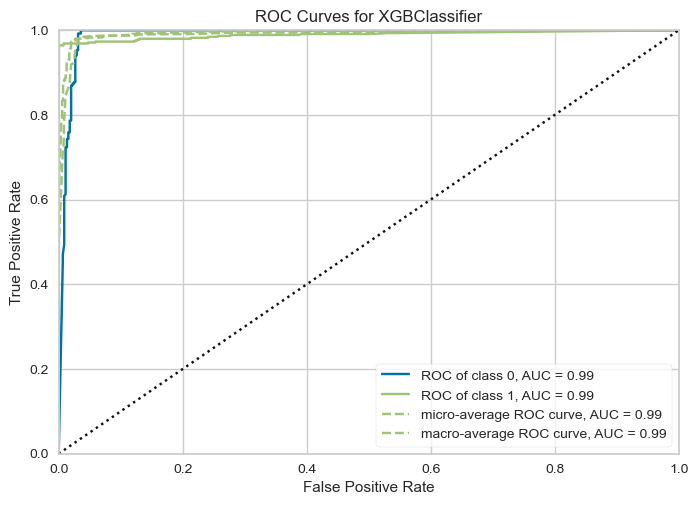

In [17]:
plot_model(tuned_xgboost, plot='auc')

## Visualiser l’importance des variables

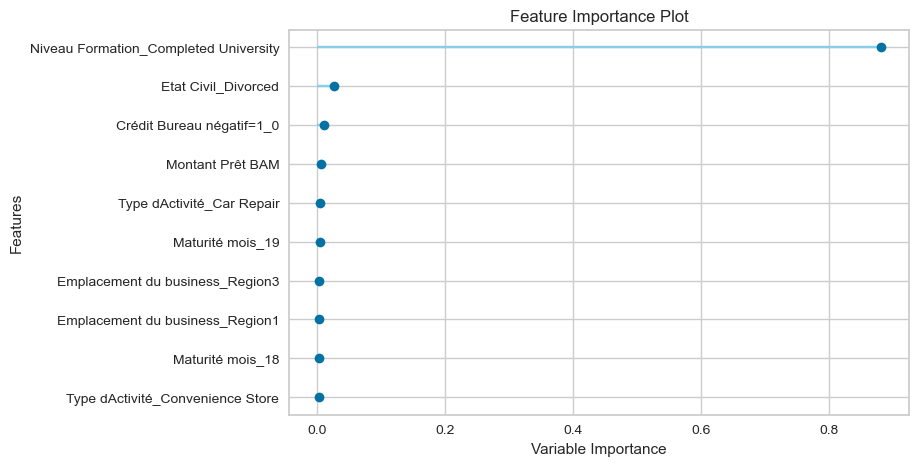

In [21]:
plot_model(tuned_xgboost,plot='feature')

## Visualisation de la matrice de confusion

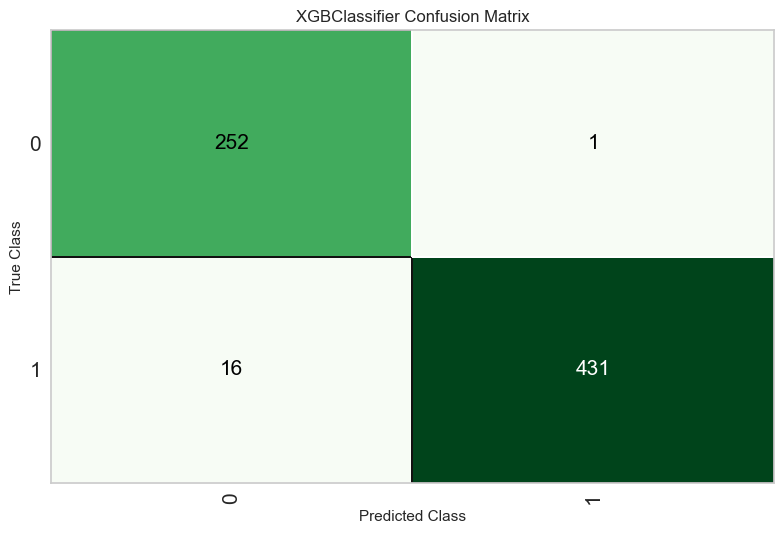

In [22]:
plot_model(tuned_xgboost, plot='confusion_matrix')

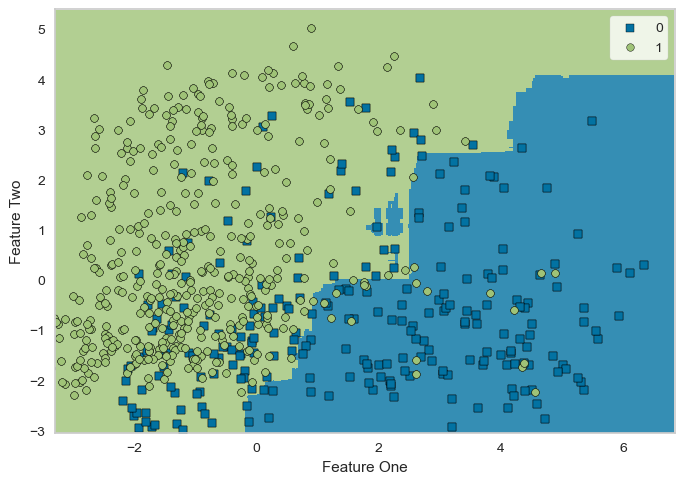

In [25]:
plot_model(tuned_xgboost, plot='boundary')

## Prediction avec le modele

In [28]:
predict_model(tuned_xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9757,0.9895,0.9642,0.9977,0.9807,0.9481,0.9491


,Montant Prêt BAM,Age ans,Ans à ladresse,Ans en Activité,Ventes Mensuelles BAM,Maturité mois_16,Maturité mois_17,Maturité mois_18,Maturité mois_19,Maturité mois_20,...,Type dActivité_Car Repair,Type dActivité_Child Care,Type dActivité_Convenience Store,Type dActivité_Craftsperson,Type dActivité_General Contractor,Type dActivité_Personal Services,Type dActivité_Small Grocers,Bad91d+=1,Label,Score
0,10650.0,31.0,0.5,0.5,7525.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.5617
1,8725.0,38.0,1.5,1.5,4500.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5170
2,7150.0,35.0,4.0,3.0,2025.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.5620
3,7875.0,48.0,8.5,7.0,6050.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.5684
4,11475.0,34.0,1.5,1.5,1400.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,11275.0,22.0,0.5,0.5,10725.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.5358
696,8700.0,38.0,6.5,3.5,1600.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.5620
697,9350.0,52.0,13.5,9.0,6250.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.5620
698,10450.0,37.0,9.5,4.0,2975.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5684


## Enregistrer le modele et le pipeline dans un format .pkl 

In [29]:
final_xgboost = finalize_model(tuned_xgboost)

In [30]:
save_model(final_xgboost, 'Final_Model_xgboost')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Bad91d+=1',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None,
                                learning_rate=0.0005, max_bin=None,
                                max_cat_threshold=None, max_cat_to_oneho

## Déployer le modèle sur streamlit avec Docker